### 데이터별 상관관계 찾기

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline 
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# minus 표시
mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family='NanumBarunGothic')

In [124]:
healthcare = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/healthcare_edit.csv'
local = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/요양기관수.csv'
hos = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/인구대비데이터정리.csv'
die = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/회피가능사망자수_십만명당.csv'
pep = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/2019총인구.csv'
die_p = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/회피가능사망율(KOSIS_2015).csv'
healthcare_t = '/content/drive/MyDrive/4조_헬스케어/자료파일/raw_data/healthcare_total.csv'

### healthcare data

In [12]:
df = pd.read_csv(healthcare)
df

,Unnamed: 0,가입자 일련번호,연령대코드,시도코드,서식코드,진료과목코드,주상병코드,입내원일수,심결가산율,심결요양급여비용총액
0,0,1,12,36,3,5,M751,1,0.25,19240
1,1,1,12,36,3,1,E1164,1,0.25,145680
2,2,1,12,36,3,1,N308,1,0.25,13240
3,3,1,12,36,2,1,E1164,21,0.25,861590
4,4,1,12,36,3,13,H6531,1,0.15,48440
...,...,...,...,...,...,...,...,...,...,...
13178340,13178340,1000000,1,37,3,21,P220,1,0.30,71000
13178341,13178341,1000000,1,37,3,11,J209,1,0.20,17620
13178342,13178342,1000000,1,37,3,12,H351,1,0.25,31890
13178343,13178343,1000000,1,37,2,11,P220,12,0.25,1757040


In [13]:
del df['Unnamed: 0']

In [139]:
df_money = df.groupby('시도코드')['심결요양급여비용총액'].sum().to_frame()
df_money

,심결요양급여비용총액
시도코드,
11,187836166960
21,85683171090
22,50084064620
23,59609191530
24,32915444680
25,30254629710
26,24540993400
29,5869375380
31,248135363540


### 인구데이터

In [140]:
pop = pd.read_csv(pep)
del pop['Unnamed: 0']

In [141]:
pop.columns

Index(['시도코드', '총 인구수(명)', '총인구_남자(명)', '총인구_여자(명)', '총인구_성비(명)'], dtype='object')

In [142]:
pop_city = pop[['시도코드', '총 인구수(명)']]

In [143]:
pop_city = pop_city.set_index('시도코드')

* 인구, 요양급여비용총액 합치기

In [144]:
df_pop = df_money.join(pop_city)
df_pop

,심결요양급여비용총액,총 인구수(명)
시도코드,,
11,187836166960,9639541
21,85683171090,3372692
22,50084064620,2429940
23,59609191530,2952237
24,32915444680,1489730
25,30254629710,1498839
26,24540993400,1143692
29,5869375380,338136
31,248135363540,13300900


인구당 심결요양급여비용 

In [145]:
df_pop['인구당 비용'] = df_pop['심결요양급여비용총액'] / df_pop['총 인구수(명)'] *100000
df_pop[['인구당 비용']].describe()

,인구당 비용
count,1.700000e+01
mean,2.233005e+09
std,3.363730e+08
min,1.735803e+09
25%,2.019119e+09
50%,2.145769e+09
75%,2.450669e+09
max,3.153158e+09


인구당 비용이 평균값 보다 작은 Top 5 
   - 29, 31, 11, 25, 23

In [146]:
df_pop.sort_values(by='인구당 비용').head()

,심결요양급여비용총액,총 인구수(명),인구당 비용
시도코드,,,
29,5869375380,338136,1.735803e+09
31,248135363540,13300900,1.865553e+09
11,187836166960,9639541,1.948601e+09
25,30254629710,1498839,2.018538e+09
23,59609191530,2952237,2.019119e+09


인구당 비용이 평균값 보다 큰 Top5
  - 36, 35, 21, 37, 38

In [91]:
df_pop.sort_values(by='인구당 비용', ascending=False).head()

,심결요양급여비용총액,총 인구수(명),인구당 비용
시도코드,,,
36,56364053840,1787543,3.153158e+09
35,46769491370,1807423,2.587634e+09
21,85683171090,3372692,2.540498e+09
37,66113537380,2668154,2.477876e+09
38,82029013970,3347209,2.450669e+09


In [92]:
a_die = pd.read_csv(die)
a_die = a_die[['시도코드', '십만명당 회피가능사망자수']]
a_die = a_die.set_index('시도코드')

In [93]:
df_pop_die = df_pop.join(a_die, how='left')
df_pop_die = df_pop_die.reset_index()

시도별 심결요양급여비용 및 회피가능사망자수 상관관계 분석 👾
  - 십만명당 회피가능사망자수 및 인구당 비용에 연관성이 있어보임 
  - 시도와 회피가능사망자수 

In [94]:
df_pop_die

,시도코드,심결요양급여비용총액,총 인구수(명),인구당 비용,십만명당 회피가능사망자수
0,11,187836166960,9639541,1.948601e+09,66.5
1,21,85683171090,3372692,2.540498e+09,86.4
2,22,50084064620,2429940,2.061124e+09,61.4
3,23,59609191530,2952237,2.019119e+09,65.6
4,24,32915444680,1489730,2.209491e+09,60.7
5,25,30254629710,1498839,2.018538e+09,55.6
6,26,24540993400,1143692,2.145769e+09,52.7
7,29,5869375380,338136,1.735803e+09,37.9
8,31,248135363540,13300900,1.865553e+09,59.5
9,32,32227158040,1520127,2.120031e+09,120.8


* 산점도 

In [95]:
X = df_pop_die['인구당 비용'].values
Y = df_pop_die['십만명당 회피가능사망자수'].values

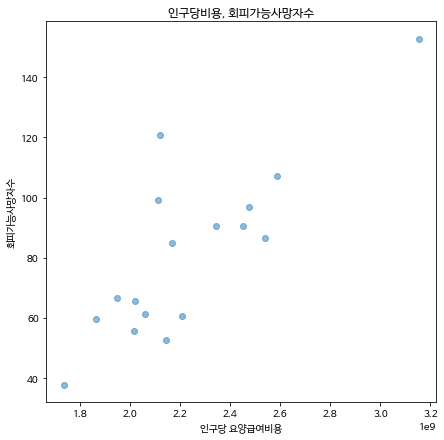

In [96]:
plt.scatter(X,Y, alpha=0.5)
plt.title('인구당비용, 회피가능사망자수')
plt.xlabel('인구당 요양급여비용')
plt.ylabel('회피가능사망자수')
plt.show()

In [97]:
import scipy.stats as stats
stats.pearsonr(X,Y)

(0.8119570495546518, 7.546563754957297e-05)

#### 상관관계 분석

In [98]:
df_pop_die.corr(method='pearson')

,시도코드,심결요양급여비용총액,총 인구수(명),인구당 비용,십만명당 회피가능사망자수
시도코드,1.000000,-0.300655,-0.325540,0.417302,0.556732
심결요양급여비용총액,-0.300655,1.000000,0.992251,-0.152993,-0.118317
총 인구수(명),-0.325540,0.992251,1.000000,-0.261606,-0.196660
인구당 비용,0.417302,-0.152993,-0.261606,1.000000,0.811957
십만명당 회피가능사망자수,0.556732,-0.118317,-0.196660,0.811957,1.000000


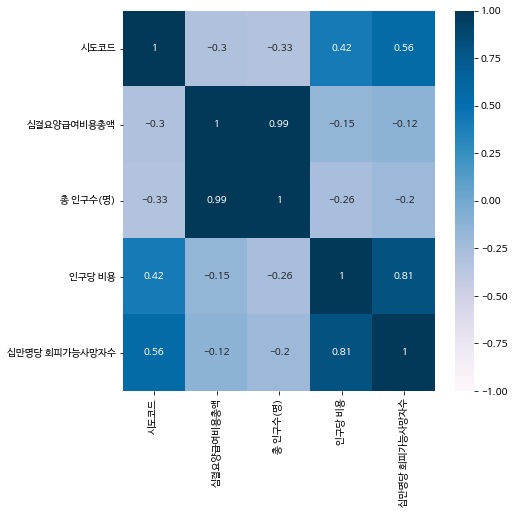

In [99]:
plt.rcParams["figure.figsize"] = (7,7)
sns.heatmap(df_pop_die.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'PuBu', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

사망율로 상관관계 확인하기 (2015년 데이터)

In [108]:
p_die = pd.read_csv(die_p)
del p_die['Unnamed: 0']
p_die.rename(columns= {'시도명': '시도코드'}, inplace=True)

In [117]:
del df_pop['인구당 비용']

In [179]:
df_pop_die_p = df_pop.join(p_die, how='left')
df_pop_die_p['인구당 심결급여비용총액'] = df_hos['심결요양급여비용총액'] / df_hos['총 인구수(명)'] 

In [184]:
X = df_pop_die_p['총 인구수(명)'].values
Y = df_pop_die_p['사망률'].values

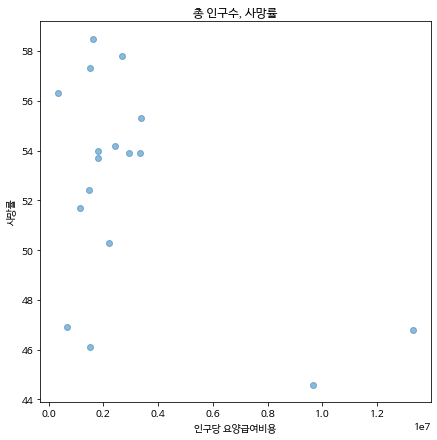

In [185]:
plt.scatter(X,Y, alpha=0.5)
plt.title('총 인구수, 사망률')
plt.xlabel('인구당 요양급여비용')
plt.ylabel('사망률')
plt.show()

✔️ 총인구수, 사망률이 약간의 연광성을 보여줌 

In [186]:
df_pop_die_p.corr(method='pearson')

,심결요양급여비용총액,총 인구수(명),인구당 비용,사망률,인구당 심결급여비용총액
심결요양급여비용총액,1.000000,0.992251,-0.152993,-0.464805,-0.152993
총 인구수(명),0.992251,1.000000,-0.261606,-0.502897,-0.261606
인구당 비용,-0.152993,-0.261606,1.000000,0.307284,1.000000
사망률,-0.464805,-0.502897,0.307284,1.000000,0.307284
인구당 심결급여비용총액,-0.152993,-0.261606,1.000000,0.307284,1.000000


#### 입원일수와 상관관계

In [152]:
df.columns

Index(['가입자 일련번호', '연령대코드', '시도코드', '서식코드', '진료과목코드', '주상병코드', '입내원일수',
       '심결가산율', '심결요양급여비용총액'],
      dtype='object')

In [156]:
df_hos = df.groupby('시도코드')[['입내원일수', '심결요양급여비용총액']].sum()
df_hos = df_hos.join(pop_city)

십만명당 회피가능 사망자수에 근거하여 다른 value도 기준을 맞춤 
  - 기준을 제외해도 결과는 동일 

In [174]:
df_hos['십만명당 입내원일수'] = df_hos['입내원일수'] / df_hos['총 인구수(명)'] * 100000
df_hos['십만명당 요양급여총액'] = df_hos['심결요양급여비용총액'] / df_hos['총 인구수(명)'] * 100000

In [175]:
df_hos

,입내원일수,심결요양급여비용총액,총 인구수(명),십만명당 입내원일수,십만명당 요양급여총액,십만명당 회피가능사망자수
시도코드,,,,,,
11,4191024,187836166960,9639541,43477.422836,1.948601e+09,66.5
21,1914593,85683171090,3372692,56767.502043,2.540498e+09,86.4
22,1113887,50084064620,2429940,45840.103048,2.061124e+09,61.4
23,1272059,59609191530,2952237,43087.970241,2.019119e+09,65.6
24,696180,32915444680,1489730,46731.958140,2.209491e+09,60.7
25,719595,30254629710,1498839,48010.159864,2.018538e+09,55.6
26,530646,24540993400,1143692,46397.631530,2.145769e+09,52.7
29,150108,5869375380,338136,44392.788700,1.735803e+09,37.9
31,5604843,248135363540,13300900,42138.825192,1.865553e+09,59.5


상관관계 분석

In [176]:
df_hos.corr(method='pearson')

,입내원일수,심결요양급여비용총액,총 인구수(명),십만명당 입내원일수,십만명당 요양급여총액,십만명당 회피가능사망자수
입내원일수,1.000000,0.999087,0.993956,-0.240546,-0.170517,-0.126633
심결요양급여비용총액,0.999087,1.000000,0.992251,-0.239145,-0.152993,-0.118317
총 인구수(명),0.993956,0.992251,1.000000,-0.335862,-0.261606,-0.196660
십만명당 입내원일수,-0.240546,-0.239145,-0.335862,1.000000,0.901911,0.777017
십만명당 요양급여총액,-0.170517,-0.152993,-0.261606,0.901911,1.000000,0.811957
십만명당 회피가능사망자수,-0.126633,-0.118317,-0.196660,0.777017,0.811957,1.000000


In [177]:
X = df_hos['십만명당 입내원일수'].values
Y = df_hos['십만명당 회피가능사망자수'].values

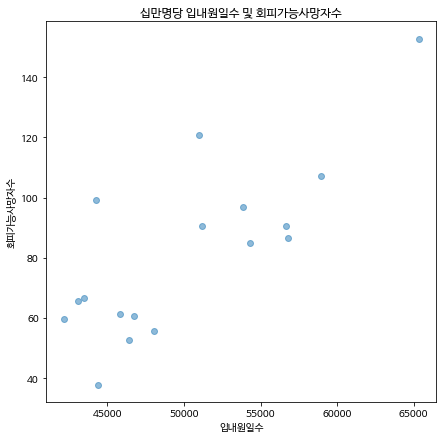

In [178]:
plt.scatter(X,Y, alpha=0.5)
plt.title('십만명당 입내원일수 및 회피가능사망자수')
plt.xlabel('입내원일수')
plt.ylabel('회피가능사망자수')
plt.show()

### 결과
- 십만명당 입내원일수 - 사망자수 (0.78)
- 십만명당 요양급여총액 - 사망자수 (0.81)
  - 급여, 입내원수, 인구수와 연관된 부분을 더욱 조사해봐야 할듯 ✔️


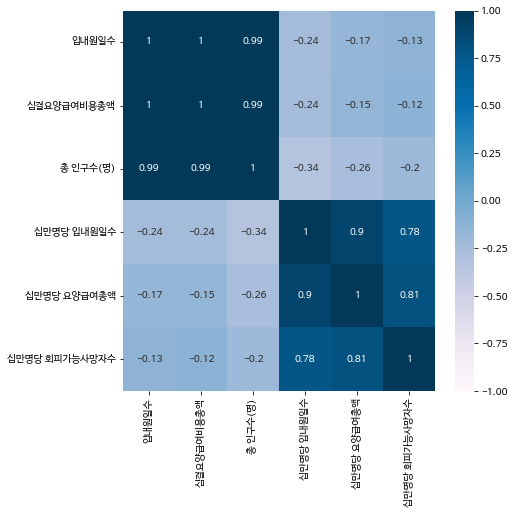

In [188]:
plt.rcParams["figure.figsize"] = (7,7)
sns.heatmap(df_hos.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'PuBu', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )